
# **Introducción a Python para Análisis de Datos**
## Capítulo 4: Limpieza de Datos
---
**Autor:** Juan Martin Bellido  

**Descripción**  
Los datos a los que nos enfrentamos en la vida diaria rara vez están limpios. En este notebook introduciremos las operaciones típicas de limpieza de datos con Python.

**¿Feedback? ¿comentarios?** Por favor compártelo conmigo escribiéndome por [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)  

**Material Adicional**

* [Guía Python Importar/Exportar DataFrames](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/python-importar-exportar)
* [Comandos Jupyter Notebook](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/comandos-rapidos-jupyter)
* [Sintaxis Markdown](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/sintaxis-markdown)



## INDICE
---
1. Valores nulos
2. Valores duplicados
3. Outliers
4. Limpieza en campos de tipo texto
5. Ejercicios


Convenciones utilizadas en este documento
> 👉 *Esto es una nota u observación*

> ⚠️ *Esto es una advertencia*

In [ ]:
# importamos las librerías/módulos necesarios en este notebook
import pandas as pd
from scipy import stats

# 1. Valores nulos
---
Un valor nulo es aquel para el cual no tenemos información disponible. Esto es algo habitual a lo que nos enfrentamos al analizar datos y suele deberse a errores en la captura/medición o manipulación de datos.



In [ ]:
# importamos DataFrame
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")

### Identificar valores nulos en un DataFrame

El primer paso es corroborar si existen valores nulos en nuestros DataFrame y, en tal caso, identificar en qué campos.

La receta que utilizaremos consta de dos funciones/métodos:

```
.isna(object)
```
> 👉 El método `.isna()` testea si los valores son nulos (True) o no (False)

```
.any(boolean object)
```
> 👉 El método `.any()` permite comprobar si al menos un elemento es True








In [ ]:
# paso 1: aplicamos isna() al DataFrame para testear si cada elemento es nulo o no
nan_values = df_jamesbond.isna() # almacenamos el resultado en un nuevo objeto
nan_values # visualizamos el objeto creado

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True
9,False,False,False,False,False,False,True


In [ ]:
# paso 2: testeamos si al menos un elemento de cada campo (columna) es True (nulo)
df_jamesbond.isna().any() # aplicamos any() al objeto nan_values 
# nota: al visualizar el objeto, encontramos valores nulos para la variable "Bond Actor Salary"

Film                 False
Year                 False
Actor                False
Director             False
Box Office           False
Budget               False
Bond Actor Salary     True
dtype: bool

In [ ]:
# sumamos valores True para contar valores nulos
df_jamesbond['Bond Actor Salary'].isna().sum()

8

### Modificar valores nulos en un DataFrame

Una vez hemos identificado valores nulos, podemos decidir entre:
*   eliminar filas que contengan al menos un valor nulo en algún campo
*   reemplazar valores nulos






#### Eliminar filas con al menos un valor nulo

In [ ]:
# hemos identificado valores nulos en campo "Bond Actor Salary", ahora procederemos a omitir filas con valores nulos en esta variable
cond = df_jamesbond["Bond Actor Salary"].isna()
df_jamesbond[-cond] # negamos la confición para omitir filas con valores nulos para variable "Bond Actor Salary"

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
14,Octopussy,1983,Roger Moore,John Glen,373.8,53.9,7.8
15,A View to a Kill,1985,Roger Moore,John Glen,275.2,54.5,9.1
16,The Living Daylights,1987,Timothy Dalton,John Glen,313.5,68.8,5.2


In [ ]:
# de forma alternativa, y más cómoda, podríamos utilizar el método .dropna() para realizar exactamente la misma operación
df_jamesbond.dropna()

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
14,Octopussy,1983,Roger Moore,John Glen,373.8,53.9,7.8
15,A View to a Kill,1985,Roger Moore,John Glen,275.2,54.5,9.1
16,The Living Daylights,1987,Timothy Dalton,John Glen,313.5,68.8,5.2


> 👉 El método `.dropna()` elimina autimáticamente cualquier fila que contenga al menos un valor nulo. Esto nos ahorra la tarea de filtrar nuestro DataFrame utilizando condiciones.

#### Reemplazar valores nulos


Eliminar filas que contengan al menos un valor nulo no suele ser la mejor solución, ya que estamos perdiendo información valiosa disponible en todos los campos no nulos.

```
.fillna(value)
```
> 👉 Este método reemplaza elementos nulos asignando el valor que establezcamos como parámetro.

In [ ]:
# podríamos simplemente reemplazar los valores nulos por 0
df_jamesbond["Bond Actor Salary"].fillna(0)

0      0.6
1      1.6
2      3.2
3      4.7
4      0.0
5      4.4
6      0.6
7      5.8
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     7.8
15     9.1
16     5.2
17     7.9
18     5.1
19    10.0
20    13.5
21    17.9
22     3.3
23     8.1
24    14.5
25     0.0
Name: Bond Actor Salary, dtype: float64

In [ ]:
# de forma alternativa podríamos optar por reeplazar valores nulos por el valor de la media para esta variable
# para conservar el cambio, debemos sobreescribir el campo
median_bond_salary = df_jamesbond["Bond Actor Salary"].mean() # calculamos la media
df_jamesbond["Bond Actor Salary"] = df_jamesbond["Bond Actor Salary"].fillna(median_bond_salary) # reemplazamos valores nulos

# 2. Valores duplicados
---
Otro problema al que solemos enfrentarnos es el de filas duplicadas en un DataFrame. En este caso, simplemente debemos identificar las filas repetidas y eliminarlas de nuestra tabla de datos.

In [ ]:
# importamos un DataFrame que contiene valores duplicados
df_duplicates = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/renfe_estaciones_duplicates.csv")

#### Identificar valores duplicados

Comenzaremos introduciendo un nuevo método que nos permitirá identificar filas duplicadas en un DataFrame.
```
.duplicated()
```
> 👉 Este método permite testear si una fila es duplicado exacto de otra existente.



In [ ]:
len(df_duplicates) # comprobamos número de filas en DataFrame

630

In [ ]:
# identificamos valores duplicados
cond = df_duplicates.duplicated()
df_duplicates[cond]

,CODIGO,DESCRIPCION,LATITUD,LONGITUD,DIRECCION,C.P.,POBLACION,PROVINCIA,PAIS
16,5000,GRANADA,37.184036,-3.609036,AVENIDA DE LOS ANDALUCES. S/N,18014.0,Granada,Granada,España
24,10204,ZARZALEJO,40.538817,-4.158073,CALLE DEL FERROCARRIL. S/N,28293.0,Zarzalejo,Madrid,España
57,11208,VITORIA/GASTEIZ,42.841528,-2.672665,PLAZUELA DE LA ESTACION. 1,1005.0,Vitoria-Gasteiz,Araba/Álava,España
74,11203,MANZANOS,42.742875,-2.867530,RIO ZADORRA KALEA. S/N,1220.0,Ribera Baja/Erribera Beitia,Araba/Álava,España
90,15006,CISNEROS,42.191068,-4.850206,CARRETERA P-932 - ESTACION FERROCARRIL. S/N,34320.0,Cisneros,Palencia,España
181,23004,PONTEVEDRA,42.421640,-8.635830,AVENIDA DE LA ESTACION. S/N,36003.0,Pontevedra,Pontevedra,España
222,31205,A GUDIÑA,42.060690,-7.132436,CARRETERA N-525 - BEATO SEBASTIAN APARICIO. S/N,32540.0,Gudiña. A,Ourense,España
227,34005,SAN PEDRO DEL ARROYO,40.803838,-4.871408,CALLE ESTACION FERROCARRIL. S/N,5350.0,San Pedro del Arroyo,Ávila,España
242,35206,NAVALMORAL DE LA MATA,39.894854,-5.545566,PLAZA ESTACION FERROCARRIL. 1,10300.0,Navalmoral de la Mata,Cáceres,España
253,37300,PUERTOLLANO,38.691411,-4.111611,CALLE MUELLE. S/N,13500.0,Puertollano,Ciudad Real,España


#### Remover valores duplicados

Continuamos con un método que nos permitirá automáticamente eliminar filas duplicadas en un DataFrame.
```
.drop_duplicates()
```


In [ ]:
df_duplicates.drop_duplicates() # removemos filas duplicadas y almacenamos el output en un nuevo objeto

,CODIGO,DESCRIPCION,LATITUD,LONGITUD,DIRECCION,C.P.,POBLACION,PROVINCIA,PAIS
0,1003,ARAHAL,37.268141,-5.548401,CALLE VIRGEN DE LOS DOLORES. S/N,41600.0,Arahal,Sevilla,España
1,1005,MARCHENA,37.334250,-5.425429,AVENIDA MAESTRO SANTOS RUANO. 8,41620.0,Marchena,Sevilla,España
2,1007,OSUNA,37.233777,-5.114840,AVENIDA ESTACION FERROCARRIL. S/N,41640.0,Osuna,Sevilla,España
3,1009,PEDRERA,37.222353,-4.893696,CALLE MANUEL ARANDA. 3,41566.0,Pedrera,Sevilla,España
4,2002,PUENTE GENIL-HERRERA,37.359712,-4.822195,CARRETERA A-318 - KM. 9 - ENTRE LOS PUEBLOS DE...,14500.0,Puente Genil,Córdoba,España
...,...,...,...,...,...,...,...,...,...
625,87814,AVIGNON TGV,43.921938,4.785813,PLACE DE L' EUROPE,NaN,AVIGNON,NaN,Francia
626,87912,AIX EN PROVENCE TGV,43.455268,5.317230,ROUTE DEPARTAMENTALE. 9,NaN,AIX EN PROVENCE,NaN,Francia
627,92102,TOLEDO,39.862365,-4.011205,CALLE PASEO DE LA ROSA. S/N,45006.0,Toledo,Toledo,España
628,94002,DAIMIEL,39.061517,-3.604049,CALLE ESTACION FERROCARRIL. S/N,13250.0,Daimiel,Ciudad Real,España


In [ ]:
len(df_duplicates.drop_duplicates()) # corroboranos que el nuevo DataFrame contiene menos filas

620

# 3. Outliers
---

El término *outlier* hace referencia a valores para un campo numérico que se apartan de lo esperado. En otras palabras, son valores que están por debajo o por encima de lo normal. 

> 👉 Para identificar outliers debemos comenzar por definir qué es lo esperable o normal. *El punto aquí es que no existe una forma únivoca u objetiva de definirlo*.

En estadística, existe una gran variedad de métodos que permiten definir outliers. A continuación, se presentan los dos más utilizados: utilizando *distribución normal (z)* y por medio del *método del rango intercuartílico*.

En función del caso de uso, estaremos interesados en eliminar valores outliers (ej. al entrenar ciertos modelos de ML) o simplemente identificarlos para comprobar posibles casos de calidad o inconsistencia.

> 👉 Es buena práctica siempre identificar outliers. Lo que hagamos con ellos dependerá del caso.


In [ ]:
# importamos DataFrame
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")

### Utilizando distribución normal (z)

Se trata probablemente del método más sencillo. En este curso, *normalizamos el campo numérico a z (distribución normal)*. 

En este método, asumimos que la variable se distribuye normalmente y la convertimos a `z`, es decir, la expresamos según *desviaciones típicas con respecto al valor de su media*. Por convención, entendemos que un valor es outlier si `z` es mayor a 3 o menor a -3. En otras palabras, entendemos que un valor es outlier si se aparta más de tres desviaciones típicas del valor de su media.

> 👉 El corte en `z=3` es meramente una convención y podríamos cambiarlo a nuestro antojo.


Utilizaremos la función `stats.zscore()` para forzar un campo numérico a z.

```
stats.zscore(column, nan_policy='omit')
```
> 👉 Esta función normaliza una variable a z





In [ ]:
# creamos un nuevo campo con el vallor normalizado de la variable "Box Office"
df_jamesbond["z_Box Office"] = stats.zscore(df_jamesbond["Box Office"],nan_policy='omit').round(2) # el argumento nan_policy nos permite omitir valores nulos, si los hubiera

In [ ]:
# seleccionamos "Box Office" y su versión normalizada
df_jamesbond[["Box Office","z_Box Office"]].sort_values("z_Box Office",ascending=False)
# nota: no detectamos outliers, siguiendo la convención z=3

,Box Office,z_Box Office
24,943.5,2.61
3,848.1,2.06
2,820.4,1.90
25,726.7,1.36
22,581.5,0.52
1,543.8,0.30
11,535.0,0.25
10,533.0,0.24
18,518.5,0.16
5,514.2,0.13


### El método del Rango Intercuartílico (IQR)

A continuación, introduciremos cómo detectar outliers utilizando el *método del rango intercuartílico (IQR)*. Este método es menos restrictivo, ya que no asumimos distribución normal. Por ello, es un método adecuado cuando nos enfrentamos a un número bajo de observaciones.

Según el método de IQR, consideramos outliers a las observaciones que se desvíen más de *1.5 x IQR*.

> 👉 El IQR es la diferencia entre donde termina el tercer y primer cuartil

> 👉 El IQR es fácilmente interpretable en un boxplot como *el tamaño de la caja*


Introducimos el método de pandas `.boxplot()` que nos permitirá visualizar fácilmente un boxplot.

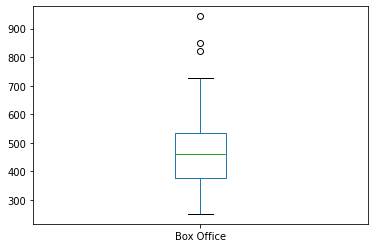

In [ ]:
# necesitamos utilizar la siguiente "magic function" de Jupyter para desplegar gráficos
%matplotlib inline

# visualizamos boxplot sencillo utilizando el método (pandas) .boxplot()
df_jamesbond.boxplot(
  column='Box Office', # seleccionamos la variable numérica
  grid=False # esto es opcional, permite quitar la cuadrícula que se genera automáticamente
)
# un boxplot automáticamente identifica outliers como puntos encima del valor máximo, o debajo del valor mínimo

El gráfico anterior nos permite confirmar que existen tres valores outliers en el margen superior. Nos interesa ahora calcular exactamente cuál es el corte superior según el método del IQR. Para ello utilizaremos el método `.quantile()` que nos permite obtener los valores para una distribución específica.

In [ ]:
# creamos variables para almacenar métricas de distribución
# en concreto, almacenamos métricas que nos permiten ver la distribución en cuartiles (es decir, dividiendo la muestra en 4 grupos)
dist_min = df_jamesbond["Box Office"].quantile(0)
dist_Q1 = df_jamesbond["Box Office"].quantile(0.25)
dist_median = df_jamesbond["Box Office"].quantile(0.5)
dist_Q3 = df_jamesbond["Box Office"].quantile(0.75)
dist_max = df_jamesbond["Box Office"].quantile(1)

In [ ]:
# calculamos rango intercuartílico (IQR)
# en terminos visuales, el IQR es el tamaño de la caja
IQR = (dist_Q3-dist_Q1)

In [ ]:
# creamos una condición para identificar outliers
# la condición es que la variable sea mayor a (IQR * 1.5) + Q3
cond = df_jamesbond["Box Office"] > (IQR * 1.5) + dist_Q3

In [ ]:
# filtramos según la condición, para visualizar filas que se consideren outliers
df_jamesbond[cond].sort_values("Box Office",ascending=False)

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,z_Box Office
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5,2.61
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,2.06
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,1.90


# 4. Limpieza de campos de tipo texto
---
A menudo un campo de tipo texto almacena información que nos gustaría dividir en múltiples columnas.




### Separar campos según delimitador

En ocasiones, nos encontramos con campos de tipo texto que nos gustaría dividir en columnas independientes utilizando algún caracter especial (delimitador).

In [ ]:
# importamos df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies[['movie_title','genres']].head()
# nota: podemos observar que el campo "genres" está tabulado de forma tal que contenga todos los géneros de la película separados por el caracter "|"

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens,Documentary


El método `.str.split()` permite separar caracteres en un campo de texto en columnas independientes.

```
df.column.str.split(
  pat="",             # delimiter
  expand=True,        # expanding to multiple columns
  n=x                 # max number of columns
  )
```


In [ ]:
# utilizamos str.split() para dividir campo en múltiples columnas
df_movies.genres.str.split(pat="|",expand=True,n=3)

,0,1,2,3
0,Action,Adventure,Fantasy,Sci-Fi
1,Action,Adventure,Fantasy,None
2,Action,Adventure,Thriller,None
3,Action,Thriller,None,None
4,Documentary,None,None,None
...,...,...,...,...
4911,Comedy,Drama,None,None
4912,Crime,Drama,Mystery,Thriller
4913,Drama,Horror,Thriller,None
4914,Comedy,Drama,Romance,None


In [ ]:
# operamos para conseguir el resultado final deseado
df_movies.genres.str.split(pat="|",expand=True,n=3)\
    .rename(columns={0:'genre_1',1:'genre_2',2:'genre_3'})\
    .join(df_movies)\
    .loc[:,['movie_title','genre_1','genre_2','genre_3']]

,movie_title,genre_1,genre_2,genre_3
0,Avatar,Action,Adventure,Fantasy
1,Pirates of the Caribbean: At World's End,Action,Adventure,Fantasy
2,Spectre,Action,Adventure,Thriller
3,The Dark Knight Rises,Action,Thriller,None
4,Star Wars: Episode VII - The Force Awakens,Documentary,None,None
...,...,...,...,...
4911,Signed Sealed Delivered,Comedy,Drama,None
4912,The Following,Crime,Drama,Mystery
4913,A Plague So Pleasant,Drama,Horror,Thriller
4914,Shanghai Calling,Comedy,Drama,Romance


### Reemplazar valores

In [ ]:
# el campo "country" reporta el país donde cada película ha sido producida
# podemos observar que EEUU está tabulado como USA
df_movies[['movie_title','country']]

,movie_title,country
0,Avatar,USA
1,Pirates of the Caribbean: At World's End,USA
2,Spectre,UK
3,The Dark Knight Rises,USA
4,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...
4911,Signed Sealed Delivered,Canada
4912,The Following,USA
4913,A Plague So Pleasant,USA
4914,Shanghai Calling,USA


Utilizamos el método `.replace()` para reemplazar fácilmente valores en campos de tipo texto.

In [ ]:
# reemplazamos los valores 'USA' por 'US' dentro del campo 'country'
# sobreescribimos el campo para conservar el cambio
df_movies['country'] = df_movies['country'].replace('USA','US')

# visualizamos
df_movies[['movie_title','country']]

,movie_title,country
0,Avatar,US
1,Pirates of the Caribbean: At World's End,US
2,Spectre,UK
3,The Dark Knight Rises,US
4,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...
4911,Signed Sealed Delivered,Canada
4912,The Following,US
4913,A Plague So Pleasant,US
4914,Shanghai Calling,US


Podríamos haber optado por realizar esta misma operación de forma más manual, por medio del método `.loc[]`.

In [ ]:
# el campo "language" recoge el idioma de la película
# cuando es inglés, está tabulado como "English"; lo cambiaremos a simplemente "EN"
df_movies[['movie_title','language']]

,movie_title,language
0,Avatar,English
1,Pirates of the Caribbean: At World's End,English
2,Spectre,English
3,The Dark Knight Rises,English
4,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...
4911,Signed Sealed Delivered,English
4912,The Following,English
4913,A Plague So Pleasant,English
4914,Shanghai Calling,English


In [ ]:
# creamos una condición para recoger los valores que queremos reemplazar
cond = df_movies.language == 'English'

# utilizamos el método .loc[] para filtrar filas y columnas
df_movies.loc[cond,'language'] = 'EN'

# visualizamos
df_movies[['movie_title','language']]

,movie_title,language
0,Avatar,EN
1,Pirates of the Caribbean: At World's End,EN
2,Spectre,EN
3,The Dark Knight Rises,EN
4,Star Wars: Episode VII - The Force Awakens,NaN
...,...,...
4911,Signed Sealed Delivered,EN
4912,The Following,EN
4913,A Plague So Pleasant,EN
4914,Shanghai Calling,EN


# 5. Ejercicios
---
> 👉 Puedes encontrar las soluciones a los ejercicios [aquí](https://nbviewer.org/github/SomosDataWizards/Python-Curso-Introductorio/blob/main/Capitulo_4_Ejercicios.ipynb)

### Ejercicio #1

##### EX 1.A Identificar columnas con valores nulos en el dataframe.
##### EX 1.B ¿Cuántas películas hay con valores nulos para el campo *director_name*?
##### EX 1.C Reemplazar valores nulos en *director_name* por "unknown".

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv


In [ ]:
import pandas as pd
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

### Ejercicio #2

Detectar empresas que sean outliers en cantidad de empleados.

##### EX 2.A Utilizando distribución normal
##### EX 2.B Utilizando el método del rango intercuartílico

> Dataset https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv

In [ ]:
import pandas as pd
from scipy import stats
df_fortune = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv')
df_fortune.dtypes

Rank          int64
Company      object
Sector       object
Industry     object
Location     object
Revenue       int64
Profits       int64
Employees     int64
dtype: object

### Ejercicio #3

El dataset contiene productos de Amazon. Limpiar las categorías de productos hasta obtener las 3 primeras para cada producto.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/amzn_products.txt



In [ ]:
import pandas as pd
df_amzn_products = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_products.txt",sep="\t")
df_amzn_products.dtypes

asin          object
brand         object
categories    object
dtype: object